## Importacion de librerias / library charges 

In [1]:
# En la documentacion de este notebook podra obtener el detalle de cada columna y procesos hechos aqui.
# Document of this notebook can help you to understand all columns and process do here  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import pymongo


#### Carga de de archivo .CSV / Load CSV file 

In [3]:
data = pd.read_csv('Corridas Stepn - SolanaRealm.csv')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energias                  376 non-null    float64
 1   ZAPA                      376 non-null    object 
 2   Gst ganado                281 non-null    float64
 3   Arreglo Gst               374 non-null    float64
 4   Coste de caja gst         118 non-null    float64
 5   GMT                       102 non-null    float64
 6   Total GST                 376 non-null    float64
 7   Caja mb                   376 non-null    object 
 8   HP%                       355 non-null    float64
 9   Obtencion caja            118 non-null    object 
 10  Upgrades                  313 non-null    float64
 11  TOTAL FECHA GST           375 non-null    float64
 12  TOTAL USDT FECHA          115 non-null    float64
 13  Fecha                     376 non-null    object 
 14  Aclaracion

In [5]:
# Dias de movimiento
# Days of running

daysactive = data['Fecha'].value_counts()
daysactive.info()


<class 'pandas.core.series.Series'>
Index: 265 entries, 11/5/23 to 2/7/23
Series name: Fecha
Non-Null Count  Dtype
--------------  -----
265 non-null    int64
dtypes: int64(1)
memory usage: 4.1+ KB


In [6]:
# Realizamos una limpieza para quedarnos con las columnas competentes para este notebook 
# Delete some colummns of csv for this notebook project 

In [7]:
data = data.drop(data.columns[20:], axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energias                  376 non-null    float64
 1   ZAPA                      376 non-null    object 
 2   Gst ganado                281 non-null    float64
 3   Arreglo Gst               374 non-null    float64
 4   Coste de caja gst         118 non-null    float64
 5   GMT                       102 non-null    float64
 6   Total GST                 376 non-null    float64
 7   Caja mb                   376 non-null    object 
 8   HP%                       355 non-null    float64
 9   Obtencion caja            118 non-null    object 
 10  Upgrades                  313 non-null    float64
 11  TOTAL FECHA GST           375 non-null    float64
 12  TOTAL USDT FECHA          115 non-null    float64
 13  Fecha                     376 non-null    object 
 14  Aclaracion

In [9]:
# Cuantas energias se usaron?
# How many energy used?

sum_total_energy = data['energias'].sum()

print(f'El total de energias usadas es de {sum_total_energy}')



El total de energias usadas es de 4685.1


In [10]:
# Cuantos zapatillas tiene activas esta cuenta?
# How many sneakers have active this account?

In [11]:
sneakers = data['ZAPA'].unique()
sneakers

array(['WL-925 ', 'WEG-579', 'WL-925', 'WEGMT-889', 'UNC-WL-432',
       'UNC-WEG-168', 'RAREMHTE-020', 'RARE-WL-1041', 'UNCO-WG-2524',
       'C-T-946', 'UNCJG-ER-269', 'TEO -638', nan], dtype=object)

In [12]:
# Vamos a remplazar todos los valores 'null' en 0, dado el caracter especifico de esta columna.
# Replace all 'null' data for 0 for context in this column.

data['TOTAL USDT FECHA'] = data['TOTAL USDT FECHA'].fillna(0)

# Sumamos los valores para saber cual es el total de USDT generados en esta cuenta.
# Sum all values for now how much USDT make this account.

sum_total_usdt = data['TOTAL USDT FECHA'].sum()

# TOTAL 

print(f'Total es {sum_total_usdt}')
print(f'Total is {sum_total_usdt}')



Total es 1324.68
Total is 1324.68


### Minado de monedas
### CoinMaker

In [13]:
data['GMT'] = data['GMT'].fillna(0)
sum_total_gmt = data['GMT'].sum()

print(f'El total de GMT minado es {sum_total_gmt}')


data['Gst ganado'] = data['Gst ganado'].fillna(0)
sum_total_gst = data['Gst ganado'].sum()

print(f'El total de GMT minado es {sum_total_gst}')



El total de GMT minado es 1002.6800000000001
El total de GMT minado es 53817.08


In [14]:
# Cuantas energias se usaron para minar GMT y GST?
# How many energys used for minning GMT y GST?

# Sabemos que hay 2 sneakers historicas que han realizado GMT minning como uso , las de mas son para Gst
# We kmow only 2 sneakers can earned Gmt, else are only for GST.

#Zapatillas GMT ;
# WEGMT-889 - RARE-WL-1041

energias_gmt = data.loc[data['ZAPA'].isin(['RARE-WL-1041', 'WEGMT-889']), 'energias']
energiassum_gmt = energias_gmt.sum()


print(f'Energias usadas para el gmt minning {energiassum_gmt}')


#Zapatillas GST ;
# WL-925 ', 'WEG-579', 'WL-925', 'UNC-WL-432',
#'UNC-WEG-168', 'RAREMHTE-020', 'UNCO-WG-2524',
#'C-T-946', 'UNCJG-ER-269', 'TEO -638'
        
        
energias_gst = data.loc[data['ZAPA'].isin(['WEG-579','UNC-WL-432','C-T-946', 'UNCJG-ER-269','UNCO-WG-2524','RAREMHTE-020','UNC-WEG-168','WL-925']), 'energias']
energiassum_gst = energias_gst.sum()
print(f'Energias usadas para el gst minning {energiassum_gst}')

# Porcentaje de minado en energias
# Distruibuited energys for minning

#total de energias 
total_energys = energiassum_gst + energiassum_gmt
print(f'Total de energias  {total_energys}')

#porcentaje energia/gst 
porcengst = energiassum_gst/total_energys

print(f'Porcentaje de gst minado {porcengst}')

#porcentaje energia/gmt 
porcengmt = energiassum_gmt/total_energys
print(f'«Porcentaje de gmt minado {porcengmt}')


Energias usadas para el gmt minning 1050.4
Energias usadas para el gst minning 3523.1
Total de energias  4573.5
Porcentaje de gst minado 0.7703290696403192
«Porcentaje de gmt minado 0.22967093035968078


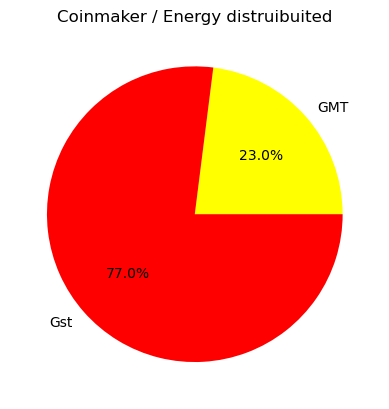

In [15]:
# Creamos un grafico de torta donde podemos ver los earning hechos a escala por energia
# Making a cake graphic for  showed earned at scale per energy

# Datos de ejemplo
labels = ['GMT', 'Gst']
values = [23, 77]
colors = ['yellow', 'red']

# Crear el gráfico de torta
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')

# Coin maker results
plt.title('Coinmaker / Energy distruibuited')

# Mostrar el gráfico
plt.show()


In [16]:
# Debemos de restar los gastos en reparaciones de zapatillas, costos de apertura de cajas, actualizaciones de gemas
# Have to consider and discount repair sneakers, opened boxes fee and gems upgrades


## Gst quemado para mbs 
## Gst burned for mbs

data['Coste de caja gst'] = data['Coste de caja gst'].fillna(0)
burnedgst_mb = data['Coste de caja gst'].sum()
print(f'El total de gst quemado es por cajas es {burnedgst_mb}')
print(f'Total for mbs opened {burnedgst_mb}')


## Gst quemado para reparaciones  
## Gst burned for repair sneakers 

data['Arreglo Gst'] = data['Arreglo Gst'].fillna(0)
repaircostgst = data['Arreglo Gst'].sum()
print(f'El total de gst quemado por reparaciones es {repaircostgst}')
print(f'Total for repair sneakers {repaircostgst}')


## Gst quemado para actualizaciones 
## Gst burned for upgrades 

data['Upgrades'] = data['Upgrades'].fillna(0)
upgradesgst = data['Upgrades'].sum()
print(f'El total de gst quemado por actualizaciones de gemas {upgradesgst}')
print(f'Total for gems upgrades {upgradesgst}')

El total de gst quemado es por cajas es 34509.0
Total for mbs opened 34509.0
El total de gst quemado por reparaciones es 4073.2599999999993
Total for repair sneakers 4073.2599999999993
El total de gst quemado por actualizaciones de gemas 32450.0
Total for gems upgrades 32450.0


### Analisis de intentos y tasa de exito en actualizaciones de gemas
### Attempts analysis and success rate of upgraded gems

In [17]:
# Creamos un conteo de tasa de exito en los upgrades de los distintos niveles.
# Make counter for success rate in upgrades of all levels.

conteolv1 = data['Success LV1'].value_counts()
conteolv2 = data['Success LV2'].value_counts()
conteolv3 = data['Success LV3'].value_counts()
conteolv4 = data['Success LV4'].value_counts()


print(f'Cantidad de datos en lv1 {conteolv1}')
print(f'Cantidad de datos en lv2 {conteolv2}')
print(f'Cantidad de datos en lv3 {conteolv3}')
print(f'Cantidad de datos en lv4 {conteolv4}')





Cantidad de datos en lv1 NO     116
YES     58
Name: Success LV1, dtype: int64
Cantidad de datos en lv2 YES    52
NO     51
Name: Success LV2, dtype: int64
Cantidad de datos en lv3 YES    95
NO     50
Name: Success LV3, dtype: int64
Cantidad de datos en lv4 YES    4
NO     1
Name: Success LV4, dtype: int64


In [18]:
# Mostrar porcentajes tasa
# Show porcentual rate

#lv1
total_yeslv1 = conteolv1['YES']
total_nolv1 = conteolv1['NO']

ratelv1 = (total_yeslv1 / (total_yeslv1 + total_nolv1)) * 100

print(f'tasa exito % {ratelv1}')
print(f'success rate % {ratelv1}')



#lv2
total_yeslv2 = conteolv2['YES']
total_nolv2 = conteolv2['NO']

ratelv2 = (total_yeslv2 / (total_yeslv2 + total_nolv2)) * 100

print(f'tasa exito % {ratelv2}')
print(f'success rate % {ratelv2}')



#lv3
total_yeslv3 = conteolv3['YES']
total_nolv3 = conteolv3['NO']

ratelv3 = (total_yeslv3 / (total_yeslv3 + total_nolv3)) * 100

print(f'tasa exito % {ratelv3}')
print(f'success rate % {ratelv3}')



#lv4
total_yeslv4 = conteolv4['YES']
total_nolv4 = conteolv4['NO']

ratelv4 = (total_yeslv4 / (total_yeslv4 + total_nolv4)) * 100

print(f'tasa exito % {ratelv4}')
print(f'success rate % {ratelv4}')


tasa exito % 33.33333333333333
success rate % 33.33333333333333
tasa exito % 50.48543689320388
success rate % 50.48543689320388
tasa exito % 65.51724137931035
success rate % 65.51724137931035
tasa exito % 80.0
success rate % 80.0


#### Interactuando con NOsql

In [19]:
from pymongo import MongoClient
Stepnosql = MongoClient()

In [20]:
# Creando una base de datos 
# Create data base 

db = Stepnosql["DBSJM"]

# Creando una coleccion
# Create coleccion 


sneakers = db["sneakers"]



In [21]:
# Commons
sneakers.insert_one({"Rarity": "Common", "Type": "Walker", "Code": "WL-925"})
sneakers.insert_one({"Rarity": "Common", "Type": "Jogger", "Code": "valor2"})
sneakers.insert_one({"Rarity": "Common", "Type": "Runner", "Code": "valor3"})
sneakers.insert_one({"Rarity": "Common", "Type": "Trainer", "Code": "C-T-946"})

# Uncommons
sneakers.insert_one({"Rarity": "Uncommon", "Type": "Walker", "Code": "WEGMT-889"})
sneakers.insert_one({"Rarity": "Uncommon", "Type": "Walker", "Code": "WEG-579"})
sneakers.insert_one({"Rarity": "Uncommon", "Type": "Walker", "Code": "UNC-WL-432"})
sneakers.insert_one({"Rarity": "Uncommon", "Type": "Walker", "Code": "UNC-WEG-168"})
sneakers.insert_one({"Rarity": "Uncommon", "Type": "Walker", "Code": "UNCO-WG-2524"})
sneakers.insert_one({"Rarity": "Uncommon", "Type": "Jogger", "Code": "UNCJG-ER-269"})


# Rare
sneakers.insert_one({"Rarity": "Rare", "Type": "Walker", "Code": "RARE-WL-1041"})
sneakers.insert_one({"Rarity": "Rare", "Type": "Jogger", "Code": "RAREMHTE-020"})
sneakers.insert_one({"Rarity": "Rare", "Type": "Runner", "Code": "valor3"})
sneakers.insert_one({"Rarity": "Rare", "Type": "Trainer", "Code": "valor4"})

# Epic
sneakers.insert_one({"Rarity": "Epic", "Type": "Walker", "Code": "WL-925"})
sneakers.insert_one({"Rarity": "Epic", "Type": "Jogger", "Code": "valor2"})
sneakers.insert_one({"Rarity": "Epic", "Type": "Runner", "Code": "valor3"})
sneakers.insert_one({"Rarity": "Epic", "Type": "Trainer", "Code": "valor4"})


In [22]:
test = db.sneakers.find()

for document in test:
    print(document)

{'_id': ObjectId('64a20f1deca521ebb9382e08'), 'Rarity': 'Common', 'Type': 'Walker', 'Code': 'WL-925'}
{'_id': ObjectId('64a20f1deca521ebb9382e09'), 'Rarity': 'Common', 'Type': 'Jogger', 'Code': 'valor2'}
{'_id': ObjectId('64a20f1deca521ebb9382e0a'), 'Rarity': 'Common', 'Type': 'Runner', 'Code': 'valor3'}
{'_id': ObjectId('64a20f1deca521ebb9382e0b'), 'Rarity': 'Common', 'Type': 'Trainer', 'Code': 'C-T-946'}
{'_id': ObjectId('64a20f1deca521ebb9382e0c'), 'Rarity': 'Uncommon', 'Type': 'Walker', 'Code': 'WEGMT-889'}
{'_id': ObjectId('64a20f1deca521ebb9382e0d'), 'Rarity': 'Uncommon', 'Type': 'Walker', 'Code': 'WEG-579'}
{'_id': ObjectId('64a20f1deca521ebb9382e0e'), 'Rarity': 'Uncommon', 'Type': 'Walker', 'Code': 'UNC-WL-432'}
{'_id': ObjectId('64a20f1deca521ebb9382e0f'), 'Rarity': 'Uncommon', 'Type': 'Walker', 'Code': 'UNC-WEG-168'}
{'_id': ObjectId('64a20f1deca521ebb9382e10'), 'Rarity': 'Uncommon', 'Type': 'Walker', 'Code': 'UNCO-WG-2524'}
{'_id': ObjectId('64a20f1deca521ebb9382e11'), 'Rari

In [28]:
data_filtrada = data[data['ZAPA'] == 'WEGMT-889']



In [33]:
# Conexión a la base de datos
Stepnosql = MongoClient()

# Obtén el DataFrame filtrado
data_filtrada = data[data['ZAPA'] == 'WEGMT-889']

# Convierte el DataFrame en una lista de documentos
documentos = data_filtrada.to_dict(orient='records')

# Inserta los documentos en la colección "clientes"
collection = db['DBSJM']
collection.insert_many(documentos)
